In [1]:
def compute_deltaX_true_from_drug(adata, control_name="DMSO_TF"):
    obs = adata.obs.copy()
    
    # 1. Control baseline
    control_mask = obs["drug"] == control_name
    if control_mask.sum() == 0:
        raise ValueError(f"No control cells found for drug={control_name}")
    
    X_control = adata.X[control_mask].toarray()
    X_control_mean = X_control.mean(axis=0)   # baseline
    
    print(f"[INFO] Control samples={control_mask.sum()}, mean shape={X_control_mean.shape}")

    # 2. Drug 목록
    drug_list = [d for d in obs["drug"].unique().tolist() if d != control_name]

    deltaX_list = []
    index_list = []

    for drug_name in drug_list:
        drug_mask = obs["drug"] == drug_name
        X_drug = adata.X[drug_mask].toarray()
        X_drug_mean = X_drug.mean(axis=0)

        deltaX = X_drug_mean - X_control_mean
        deltaX_list.append(deltaX)
        index_list.append(drug_name)
        
        print(f"[INFO] {drug_name}: {drug_mask.sum()} cells")

    genes = adata.var.index.tolist()
    deltaX_df = pd.DataFrame(deltaX_list, index=index_list, columns=genes)

    return deltaX_df, X_control_mean

In [ ]:
import scanpy as sc
import pandas as pd

adata = sc.read_h5ad("../outputs/tahoe_CVCL_0546_hvg5000_union.h5ad")

deltaX_true_df, X_control_mean = compute_deltaX_true_from_drug(adata, control_name="DMSO_TF")
deltaX_true_df.head()

[INFO] Control samples=16527, mean shape=(5084,)
[INFO] 8-Hydroxyquinoline: 7477 cells
[INFO] Chlorhexidine (diacetate): 8830 cells
[INFO] Trifluridine: 8519 cells
[INFO] Berbamine: 10265 cells
[INFO] Retinoic acid: 9966 cells
[INFO] Cysteamine (hydrochloride): 8170 cells
[INFO] Vinblastine (sulfate): 10046 cells
[INFO] Pasireotide (acetate): 10039 cells
[INFO] Riluzole hydrochloride: 9990 cells
[INFO] Palmatine (chloride): 11124 cells
[INFO] Isocorydine: 9697 cells
[INFO] Raltitrexed: 8426 cells
[INFO] (R)-Verapamil (hydrochloride): 10122 cells
[INFO] Temsirolimus: 9467 cells
[INFO] Megestrol: 9006 cells
[INFO] Salicylic acid: 9397 cells
[INFO] Quinestrol: 13246 cells
[INFO] Tolcapone: 9899 cells
[INFO] Terfenadine: 10102 cells
[INFO] Aliskiren: 11747 cells
[INFO] Idarubicin (hydrochloride): 8651 cells
[INFO] Ritonavir: 8226 cells
[INFO] Larotrectinib: 10446 cells
[INFO] Cepharanthine: 9071 cells
[INFO] Radotinib: 9640 cells
[INFO] Tucidinostat: 9513 cells
[INFO] Bergenin: 9698 cells


,ENSG00000001084,ENSG00000001626,ENSG00000002587,ENSG00000003096,ENSG00000003987,ENSG00000003989,ENSG00000004468,ENSG00000004776,ENSG00000004799,ENSG00000005102,...,ENSG00000291199,ENSG00000291222,ENSG00000291227,ENSG00000291237,ENSG00000291240,ENSG00000291248,ENSG00000291257,ENSG00000291258,ENSG00000291296,ENSG00000291297
8-Hydroxyquinoline,0.088306,0.000867,0.005559,0.005620,0.000066,0.016709,0.007391,-0.002270,0.014440,-0.000315,...,0.000000,0.000115,0.000000,0.062781,-0.000511,0.000000,0.000155,-0.002461,0.0,0.000114
Chlorhexidine (diacetate),0.070675,-0.000234,0.003488,0.001071,-0.000673,0.010049,-0.000063,-0.001575,0.009156,0.000870,...,0.000168,-0.000162,0.000000,0.064400,-0.000659,0.000000,-0.000806,0.001048,0.0,0.001295
Trifluridine,0.004380,-0.005508,0.001847,0.003327,0.000328,0.005227,0.001881,-0.001332,0.016631,-0.000258,...,0.000241,-0.000162,0.000000,-0.003856,0.000086,0.000000,-0.000551,-0.002074,0.0,-0.000879
Berbamine,0.040972,0.005270,0.015391,0.008522,0.002463,0.031677,0.001396,-0.000376,0.018447,0.000030,...,0.000000,-0.000162,0.000181,-0.053353,-0.000367,0.000000,-0.000052,0.000383,0.0,-0.000320
Retinoic acid,0.096441,0.018482,0.014164,0.008688,0.005166,0.045518,0.006531,0.000102,0.025530,-0.000472,...,0.000000,-0.000162,0.000176,0.020680,-0.000720,0.000333,0.000611,-0.000564,0.0,0.000951


## 2. Drug target 정보 확인

In [3]:
import pandas as pd
import ast

def load_drug_target_dict(path):
    df = pd.read_csv(path)

    drug_to_targets = {}

    for _, row in df.iterrows():
        drug = row["drug"]

        # 문자열 형태의 리스트를 실제 리스트로 변환
        targets_str = row["targets"]
        targets = ast.literal_eval(targets_str)

        # 리스트로 저장
        drug_to_targets[drug] = targets

    return drug_to_targets

In [ ]:
path = "../drug_dict/drug_targets_CVCL0546.csv"
drug_to_targets = load_drug_target_dict(path)

drug_to_targets["Adagrasib"]

['KRAS']

In [5]:
import scanpy as sc
import numpy as np
import pandas as pd
import ast

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [6]:
import os
import torch

# 🚀 6번 GPU만 보이게 설정 (여기가 핵심!)
os.environ["CUDA_VISIBLE_DEVICES"] = "6"

# 설정 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Current Device: {device}")

if torch.cuda.is_available():
    # 여기서 'cuda:0'이라고 떠도 놀라지 마세요!
    # 우리는 6번만 보이게 가려놨기 때문에, 파이썬은 6번을 '유일한 0번'으로 인식합니다.
    print(f"Target GPU: {torch.cuda.get_device_name(0)}") 
    print("✅ 물리적 6번 GPU(A100)를 독점적으로 사용합니다!")

Current Device: cuda
Target GPU: NVIDIA A100-SXM4-80GB
✅ 물리적 6번 GPU(A100)를 독점적으로 사용합니다!


In [ ]:
h5ad_path = "../outputs/tahoe_CVCL_0546_hvg5000_union.h5ad"
adata = sc.read_h5ad(h5ad_path)

# 유전자 이름 리스트
gene_list = list(adata.var_names)

adata = adata[:, gene_list]

print("gene 개수:", len(gene_list))
print("gene_list[:10]:", gene_list[:10])

gene 개수: 5084
gene_list[:10]: ['ENSG00000001084', 'ENSG00000001626', 'ENSG00000002587', 'ENSG00000003096', 'ENSG00000003987', 'ENSG00000003989', 'ENSG00000004468', 'ENSG00000004776', 'ENSG00000004799', 'ENSG00000005102']


In [8]:
import json
import re
import torch
import pandas as pd
import numpy as np
import scanpy as sc

# 경로 설정 (사용자 환경에 맞춰 수정됨)
SCGPT_VOCAB = "/data/aiffel/data/vocab.json"
SCGPT_CKPT  = "/data/aiffel/data/best_model.pt"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Device: {device}")

Device: cuda


In [9]:
class GeneEmbedding(nn.Module):
    def __init__(self, vocab_size, d_model):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, d_model)

    def forward(self, input_ids):
        return self.embedding(input_ids)


class AttrEmbedding(nn.Module):
    def __init__(self, d_model):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Linear(1, d_model),
            nn.ReLU(),
            nn.Linear(d_model, d_model)
        )

    def forward(self, values):
        # values: (B, L)
        return self.mlp(values.unsqueeze(-1))


class PosEmbedding(nn.Module):
    def __init__(self, max_len, d_model):
        super().__init__()
        self.pos = nn.Embedding(max_len, d_model)

    def forward(self, input_ids):
        # input_ids: (B, L) → 길이 L 이용해서 position ID 생성
        B, L = input_ids.shape
        pos_ids = torch.arange(L, device=input_ids.device).unsqueeze(0).expand(B, L)
        return self.pos(pos_ids)


class Cell2SentenceEncoder(nn.Module):
    def __init__(self, vocab_size, d_model=256, n_heads=8, num_layers=4, max_len=512):
        super().__init__()

        self.gene_emb = GeneEmbedding(vocab_size, d_model)
        self.attr_emb = AttrEmbedding(d_model)
        self.pos_emb  = PosEmbedding(max_len, d_model)

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=1024,
            batch_first=True,
            dropout=0.1,
        )
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

    def forward(self, input_ids, values, attention_mask):
        """
        input_ids:      (B, L)  token index
        values:         (B, L)  baseline expr or 0
        attention_mask: (B, L)  1=유효, 0=PAD
        """
        e_gene = self.gene_emb(input_ids)
        e_attr = self.attr_emb(values)
        e_pos  = self.pos_emb(input_ids)

        x = e_gene + e_attr + e_pos   # (B, L, d_model)

        key_padding_mask = (attention_mask == 0)  # True=PAD
        out = self.encoder(x, src_key_padding_mask=key_padding_mask)

        h_cls = out[:, 0, :]          # [CLS] 토큰
        return h_cls

In [10]:
class FRHead(nn.Module):
    def __init__(self, d_model, n_genes):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Linear(d_model, d_model),
            nn.ReLU(),
            nn.Linear(d_model, n_genes)
        )

    def forward(self, h_cls):
        # h_cls: (B, d_model)
        return self.mlp(h_cls)        # (B, n_genes)


class FRModel(nn.Module):
    def __init__(self, encoder, d_model, n_genes):
        super().__init__()
        self.encoder = encoder
        self.head = FRHead(d_model, n_genes)

    def forward(self, input_ids, values, mask):
        h_cls = self.encoder(input_ids, values, mask)
        deltaX_pred = self.head(h_cls)
        return deltaX_pred

In [ ]:
TARGETS_CSV = "../drug_dict/drug_targets_CVCL0546.csv"

drug_targets_df = pd.read_csv(TARGETS_CSV)
drug_targets_df["targets"] = drug_targets_df["targets"].apply(ast.literal_eval)

drug_to_targets = dict(zip(drug_targets_df["drug"], drug_targets_df["targets"]))
list(drug_to_targets.items())[:5]

[('Adagrasib', ['KRAS']),
 ('Aliskiren', ['REN']),
 ('Anethole trithione', ['TGM2']),
 ('Clonidine (hydrochloride)',
  ['ADRA1A', 'ADRA1B', 'ADRA1D', 'ADRA2A', 'ADRA2B', 'ADRA2C', 'AOC3']),
 ('Goserelin (acetate)', ['GNRH1', 'GNRHR', 'LHCGR'])]

In [12]:
from sklearn.model_selection import train_test_split
import numpy as np

control_drug = "DMSO_TF"

# 1) 전체 drug 목록에서 control은 제외
all_drugs = adata.obs["drug"].unique().tolist()
drug_list = [d for d in all_drugs if d != control_drug]

print("전체 drug 개수:", len(drug_list))
print("예시 drugs:", drug_list[:10])

# 2) drug 단위로 train / temp (valid+test) 먼저 나누기
train_drugs, temp_drugs = train_test_split(
    drug_list,
    test_size=0.3,      # 70% train, 30% (valid+test)
    random_state=42
)

# 3) temp를 다시 valid / test로 나누기
valid_drugs, test_drugs = train_test_split(
    temp_drugs,
    test_size=0.5,      # 15% valid, 15% test
    random_state=42
)

print("Train drugs 개수:", len(train_drugs))
print("Valid drugs 개수:", len(valid_drugs))
print("Test  drugs 개수:", len(test_drugs))

print("Train drugs 예시:", train_drugs[:5])
print("Valid drugs 예시:", valid_drugs[:5])
print("Test  drugs 예시:", test_drugs[:5])

# 4) 이제 각 drug set에 해당하는 cell index 뽑기
train_mask = adata.obs["drug"].isin(train_drugs)
valid_mask = adata.obs["drug"].isin(valid_drugs)
test_mask  = adata.obs["drug"].isin(test_drugs)

train_idx = np.where(train_mask.values)[0]
valid_idx = np.where(valid_mask.values)[0]
test_idx  = np.where(test_mask.values)[0]

print("Train cells:", len(train_idx))
print("Valid cells:", len(valid_idx))
print("Test  cells:", len(test_idx))

전체 drug 개수: 48
예시 drugs: ['8-Hydroxyquinoline', 'Chlorhexidine (diacetate)', 'Trifluridine', 'Berbamine', 'Retinoic acid', 'Cysteamine (hydrochloride)', 'Vinblastine (sulfate)', 'Pasireotide (acetate)', 'Riluzole hydrochloride', 'Palmatine (chloride)']
Train drugs 개수: 33
Valid drugs 개수: 7
Test  drugs 개수: 8
Train drugs 예시: ['Temsirolimus', 'Tolcapone', 'Anethole trithione', 'Salicylic acid', 'Palmatine (chloride)']
Valid drugs 예시: ['Neratinib (maleate)', 'Radotinib', 'Aliskiren', 'Riluzole hydrochloride', 'Vinblastine (sulfate)']
Test  drugs 예시: ['Tucidinostat', 'Berbamine', 'Bimatoprost', 'Pyridoxine (hydrochloride)', 'Cloxacillin (sodium)']
Train cells: 328977
Valid cells: 70658
Test  cells: 77206


In [13]:
# 1. adata 로드 (이미 로드되어 있다면 생략 가능)
# adata = sc.read_h5ad("./outputs/tahoe_CVCL_0546_hvg5000_union.h5ad")

# 2. Local Vocab 생성 (우리 모델 전용)
#    [PAD], [CLS], [FR] 등 특수 토큰 + 유전자 리스트
special_tokens = ["[PAD]", "[CLS]", "[FR]"]
gene_names = adata.var_names.tolist()  # ENSG ID들이 들어있다고 가정

# token_to_id: 우리 모델이 사용할 단어장
local_token_to_id = {}
idx = 0

# 특수 토큰 추가
for tok in special_tokens:
    local_token_to_id[tok] = idx
    idx += 1

# 유전자 추가
for g in gene_names:
    local_token_to_id[g] = idx
    idx += 1

VOCAB_SIZE = len(local_token_to_id)
print(f"Local Vocab Size: {VOCAB_SIZE}")

# 3. gene_md 데이터프레임 생성 (팀원분 코드 호환용)
#    ensembl_id, gene_symbol, token_id 컬럼이 필요함
gene_md = pd.DataFrame({
    "ensembl_id": gene_names,
    # 만약 adata.var에 'gene_symbol' 컬럼이 있으면 그걸 쓰고, 없으면 ID를 그대로 씁니다.
    "gene_symbol": adata.var["gene_symbol"] if "gene_symbol" in adata.var.columns else gene_names, 
    "token_id": [local_token_to_id[g] for g in gene_names]
})

print("gene_md 생성 완료:")
print(gene_md.head())

Local Vocab Size: 5087
gene_md 생성 완료:
                      ensembl_id gene_symbol  token_id
ensembl_id                                            
ENSG00000001084  ENSG00000001084        GCLC         3
ENSG00000001626  ENSG00000001626        CFTR         4
ENSG00000002587  ENSG00000002587      HS3ST1         5
ENSG00000003096  ENSG00000003096      KLHL13         6
ENSG00000003987  ENSG00000003987       MTMR7         7


In [14]:
# ========================================================
# [팀원분 코드 파트 1] scGPT Vocab 로드 및 파싱
# ========================================================
with open(SCGPT_VOCAB, 'r') as f:
    vocab = json.load(f)

scgpt_token_to_idx = {tok: int(i) for tok, i in vocab.items()}
symbol_to_idx = {}
ensg_to_idx = {}

for tok, idx in scgpt_token_to_idx.items():
    # 특수 토큰 건너뛰기
    if tok.startswith("<") or tok.startswith("["): # scGPT vocab 형식에 따라 수정 (<pad> or [PAD])
        continue
    
    # 토큰 이름 안에서 ENSG 패턴 찾기
    m = re.search(r"(ENSG\d+)", tok)
    if m:
        ensg = m.group(1)
        ensg_to_idx.setdefault(ensg, idx)
        symbol = tok.split("_ENSG")[0]
        symbol_to_idx.setdefault(symbol, idx)
    else:
        symbol = tok
        symbol_to_idx.setdefault(symbol, idx)

print("scGPT gene symbol 토큰 수:", len(symbol_to_idx))
print("scGPT ENSG 토큰 수:", len(ensg_to_idx))

# ========================================================
# [팀원분 코드 파트 2] Tahoe 유전자를 scGPT 인덱스로 매핑
# ========================================================
tahoe_to_scgpt_idx = {}
for _, row in gene_md.iterrows():
    symbol = str(row["gene_symbol"])
    ensg   = str(row["ensembl_id"])
    idx = None
    
    # 1순위: gene symbol
    if symbol in symbol_to_idx:
        idx = symbol_to_idx[symbol]
    # 2순위: ENSG
    elif ensg in ensg_to_idx:
        idx = ensg_to_idx[ensg]

    if idx is not None:
        tahoe_to_scgpt_idx[ensg] = idx

print("scGPT 인덱스를 찾은 Tahoe 유전자 수:", len(tahoe_to_scgpt_idx))

# ========================================================
# [팀원분 코드 파트 3] Checkpoint 로드 및 가중치 추출
# ========================================================
ckpt = torch.load(SCGPT_CKPT, map_location="cpu")

if 'model_state_dict' in ckpt:
    state = ckpt['model_state_dict']
elif 'state_dict' in ckpt:
    state = ckpt['state_dict']
else:
    state = ckpt

EMB_KEY = "encoder.embedding.weight"
scgpt_emb_weight = state[EMB_KEY]
print("scGPT embedding weight shape:", scgpt_emb_weight.shape)

D_MODEL = 512 # scGPT 차원
d_scgpt = scgpt_emb_weight.shape[1]
if d_scgpt != D_MODEL:
    raise ValueError(f"D_MODEL({D_MODEL})과 scGPT 임베딩 차원({d_scgpt})이 다릅니다.")

# ========================================================
# [팀원분 코드 파트 4] new_weight 생성 (핵심!)
# ========================================================
# 우리 Vocab 크기만큼 랜덤 초기화
new_weight = torch.randn(VOCAB_SIZE, D_MODEL) * 0.02
missing = 0

for _, row in gene_md.iterrows():
    ensg = str(row["ensembl_id"])
    tid  = int(row["token_id"]) # 우리 모델에서의 ID

    if tid >= VOCAB_SIZE:
        continue

    # 매핑 정보가 있으면 scGPT 가중치 복사
    if ensg in tahoe_to_scgpt_idx:
        sc_idx = tahoe_to_scgpt_idx[ensg]
        new_weight[tid] = scgpt_emb_weight[sc_idx]
    else:
        missing += 1

print(f"scGPT 임베딩 복사된 유전자 수: {len(gene_md) - missing}")
print(f"scGPT에 없는 유전자 수(랜덤 초기화): {missing}")

scGPT gene symbol 토큰 수: 59429
scGPT ENSG 토큰 수: 2061
scGPT 인덱스를 찾은 Tahoe 유전자 수: 3509


/data/aiffel/.cache/tmp/ipykernel_419424/1683973313.py:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(SCGPT_CKPT, map_location="cpu")


scGPT embedding weight shape: torch.Size([60697, 512])
scGPT 임베딩 복사된 유전자 수: 3509
scGPT에 없는 유전자 수(랜덤 초기화): 1575


In [15]:
class FastFRDataset(Dataset):
    def __init__(
        self,
        adata,
        token_to_id,
        drug_to_targets,
        max_len=512,
        top_k=300,
        control_drug="DMSO_TF",
        sample_indices=None,
    ):
        super().__init__()
        print("⚡ 데이터셋 초기화 중... (RAM에 데이터 로드 시작)")
        
        # 1. 메타데이터 저장
        self.token_to_id = token_to_id
        self.drug_to_targets = drug_to_targets
        self.max_len = max_len
        self.top_k = top_k
        self.control_drug = control_drug
        self.gene_names = adata.var_names.tolist()
        
        # 2. Special Tokens ID 미리 찾아두기 (매번 검색 X)
        self.cls_id = self.token_to_id.get("[CLS]", 0)
        self.pad_id = self.token_to_id.get("[PAD]", 0)
        self.fr_id  = self.token_to_id.get("[FR]", 0)

        # 3. 인덱스 설정
        is_drug = adata.obs["drug"] != control_drug
        has_target = adata.obs["drug"].isin(drug_to_targets.keys())
        base_mask = (is_drug & has_target)
        all_candidate_indices = np.where(base_mask.values)[0]

        if sample_indices is None:
            self.sample_indices = all_candidate_indices
        else:
            self.sample_indices = np.intersect1d(all_candidate_indices, sample_indices)
            
        print(f"   -> 총 {len(self.sample_indices)}개 샘플 로드 예정")

        # =========================================================
        # 🚀 [속도 최적화 1] Baseline 및 정렬 미리 계산 (1번만 실행)
        # =========================================================
        control_mask = (adata.obs["drug"] == control_drug)
        if control_mask.sum() == 0:
             raise ValueError("DMSO_TF control cell이 없습니다.")
        
        self.baseline_expr = np.array(adata.X[control_mask].mean(axis=0)).ravel()
        
        # 매번 하던 argsort를 미리 수행
        self.sorted_gene_idx = np.argsort(-np.abs(self.baseline_expr))[:self.top_k]
        
        # Baseline 토큰 ID와 Value도 미리 리스트로 만들어둠
        self.base_token_ids = []
        self.base_values = []
        
        for idx in self.sorted_gene_idx:
            gene = self.gene_names[idx]
            if gene in self.token_to_id:
                self.base_token_ids.append(self.token_to_id[gene])
                self.base_values.append(float(self.baseline_expr[idx]))
                
        # =========================================================
        # 🚀 [속도 최적화 2] 데이터를 RAM에 Dense Array로 미리 로드
        # =========================================================
        # 사용되는 약물 이름 미리 추출 (Pandas 접근 오버헤드 제거)
        self.drug_names = adata.obs["drug"].iloc[self.sample_indices].values 
        
        # Sparse Matrix -> Dense Matrix 변환 (가장 중요한 부분!)
        # 이제 __getitem__에서 toarray()를 호출하지 않아도 됨
        if hasattr(adata.X, "toarray"):
            self.X_data = adata.X[self.sample_indices].toarray() 
        else:
            self.X_data = adata.X[self.sample_indices]
            
        print("✅ 데이터 로드 완료! (이제 학습이 매우 빨라질 것입니다)")

    def __len__(self):
        return len(self.sample_indices)

    def __getitem__(self, idx):
        # 🚀 1. 미리 로드한 배열에서 바로 가져옴 (0.00001초 소요)
        x_drug = self.X_data[idx] # (n_genes, )
        drug_name = self.drug_names[idx]
        
        # 2. Delta X 계산
        deltaX_true = x_drug - self.baseline_expr
        
        # 3. Input 구성 (Python List 연산 최소화)
        # [CLS] + [FR] + Baseline(Fixed) + Target(Dynamic)
        
        input_ids = [self.cls_id, self.fr_id] + self.base_token_ids
        values    = [0.0, 0.0] + self.base_values
        
        # Target 유전자 추가
        target_genes = self.drug_to_targets.get(drug_name, [])
        for tg in target_genes:
            if tg in self.token_to_id:
                input_ids.append(self.token_to_id[tg])
                values.append(0.0)
                
        # 4. Padding
        curr_len = len(input_ids)
        pad_len = self.max_len - curr_len
        
        if pad_len > 0:
            input_ids.extend([self.pad_id] * pad_len)
            values.extend([0.0] * pad_len)
            mask = [1] * curr_len + [0] * pad_len
        else:
            input_ids = input_ids[:self.max_len]
            values = values[:self.max_len]
            mask = [1] * self.max_len

        return (
            torch.tensor(input_ids, dtype=torch.long),
            torch.tensor(values, dtype=torch.float32),
            torch.tensor(mask, dtype=torch.long),
            torch.tensor(deltaX_true, dtype=torch.float32)
        )

In [16]:
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

# =====================================================
# 1. Dataset 생성 (Train, Valid, Test 모두 생성)
# =====================================================

import os

# CPU 코어 수 확인 (너무 많이 쓰면 오버헤드 발생하므로 적절히 조절)
num_workers = min(8, os.cpu_count() or 4) 

# =====================================================
# DataLoader 생성 (RAM 로드 방식이므로 worker 불필요)
# =====================================================
from torch.utils.data import DataLoader

# =====================================================
# ⚡ FastFRDataset 사용 (메모리 로드 방식)
# =====================================================

# 1. Train
train_dataset = FastFRDataset(
    adata=adata,
    token_to_id=local_token_to_id, 
    drug_to_targets=drug_to_targets,
    max_len=512,
    control_drug="DMSO_TF",
    sample_indices=train_idx
)

# 2. Valid
valid_dataset = FastFRDataset(
    adata=adata,
    token_to_id=local_token_to_id,
    drug_to_targets=drug_to_targets,
    max_len=512,
    control_drug="DMSO_TF",
    sample_indices=valid_idx
)

# 3. Test
test_dataset = FastFRDataset(
    adata=adata,
    token_to_id=local_token_to_id,
    drug_to_targets=drug_to_targets,
    max_len=512,
    control_drug="DMSO_TF",
    sample_indices=test_idx
)

# 4. DataLoader (num_workers=0 필수!)
# 데이터가 이미 RAM에 있으므로 워커가 필요 없습니다. 0이 제일 빠릅니다.
batch_size = 512
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False, num_workers=0)

print(f"✅ 모든 준비 완료! - Train: {len(train_dataset)}, Valid: {len(valid_dataset)}")


# =====================================================
# 2. 모델 초기화
# =====================================================
# 🚨 D_MODEL=512 필수 (scGPT 차원)
encoder = Cell2SentenceEncoder(
    vocab_size=VOCAB_SIZE,   # 5087개 정도 (Local Vocab Size)
    d_model=512,             # scGPT 차원
    n_heads=8,
    num_layers=4,
    max_len=512,
).to(device)


# =====================================================
# 3. ✨✨✨ 생성해둔 new_weight 주입 ✨✨✨
# =====================================================
# new_weight는 이미 (VOCAB_SIZE, 512) 크기입니다.
with torch.no_grad():
    encoder.gene_emb.embedding.weight.copy_(new_weight.to(device))
    
    # (선택) scGPT에서 가져온 가중치는 고정하고 싶다면:
encoder.gene_emb.embedding.weight.requires_grad = True 
    # 하지만 일부 유전자는 랜덤 초기화(missing)되었으므로, 
    # 전체를 학습 가능하게 두거나(Fine-tuning), missing만 학습하게 하는 전략이 필요할 수 있음.
    # 일단은 전체 학습 가능하게 두는 것을 추천합니다.


# =====================================================
# 4. 전체 모델 및 옵티마이저
# =====================================================
fr_model = FRModel(
    encoder=encoder,
    d_model=512, 
    n_genes=len(gene_names)
).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(fr_model.parameters(), lr=1e-4)

print("✅ 모델 초기화 및 scGPT 가중치 이식(new_weight) 완료!")

⚡ 데이터셋 초기화 중... (RAM에 데이터 로드 시작)
   -> 총 123480개 샘플 로드 예정
✅ 데이터 로드 완료! (이제 학습이 매우 빨라질 것입니다)
⚡ 데이터셋 초기화 중... (RAM에 데이터 로드 시작)
   -> 총 21793개 샘플 로드 예정
✅ 데이터 로드 완료! (이제 학습이 매우 빨라질 것입니다)
⚡ 데이터셋 초기화 중... (RAM에 데이터 로드 시작)
   -> 총 9966개 샘플 로드 예정
✅ 데이터 로드 완료! (이제 학습이 매우 빨라질 것입니다)
✅ 모든 준비 완료! - Train: 123480, Valid: 21793
✅ 모델 초기화 및 scGPT 가중치 이식(new_weight) 완료!


In [17]:
from tqdm import tqdm

n_epochs = 5   # 테스트용
fr_model.train()

for epoch in range(1, n_epochs + 1):
    epoch_loss = 0.0

    # tqdm progress bar (epoch별)
    pbar = tqdm(train_loader, desc=f"Epoch {epoch}", leave=True)

    for batch in pbar:
        input_ids, values, mask, deltaX_true = batch

        input_ids = input_ids.to(device)
        values    = values.to(device)
        mask      = mask.to(device)
        deltaX_true = deltaX_true.to(device)

        optimizer.zero_grad()

        deltaX_pred = fr_model(input_ids, values, mask)

        loss = criterion(deltaX_pred, deltaX_true)
        loss.backward()
        optimizer.step()

        # accumulate
        epoch_loss += loss.item() * input_ids.size(0)

        # tqdm bar에 현재 batch loss 표시
        pbar.set_postfix({"batch_loss": loss.item()})

    avg_loss = epoch_loss / len(train_dataset)
    print(f"[Epoch {epoch}] f_r MSE loss: {avg_loss:.6f}")

Epoch 1: 100%|██████████| 242/242 [06:56<00:00,  1.72s/it, batch_loss=0.109] 


[Epoch 1] f_r MSE loss: 0.103447


Epoch 2: 100%|██████████| 242/242 [06:33<00:00,  1.63s/it, batch_loss=0.1]  


[Epoch 2] f_r MSE loss: 0.102563


Epoch 3: 100%|██████████| 242/242 [06:19<00:00,  1.57s/it, batch_loss=0.106] 


[Epoch 3] f_r MSE loss: 0.102549


Epoch 4: 100%|██████████| 242/242 [06:20<00:00,  1.57s/it, batch_loss=0.104] 


[Epoch 4] f_r MSE loss: 0.102544


Epoch 5: 100%|██████████| 242/242 [06:20<00:00,  1.57s/it, batch_loss=0.105] 

[Epoch 5] f_r MSE loss: 0.102543


In [18]:
def evaluate(model, loader):
    model.eval()
    total_loss = 0.0
    count = 0

    with torch.no_grad():
        for batch in loader:
            input_ids, values, mask, deltaX_true = batch

            input_ids = input_ids.to(device)
            values    = values.to(device)
            mask      = mask.to(device)
            deltaX_true = deltaX_true.to(device)

            deltaX_pred = model(input_ids, values, mask)
            loss = criterion(deltaX_pred, deltaX_true)

            total_loss += loss.item() * input_ids.size(0)
            count += input_ids.size(0)

    model.train()
    return total_loss / count

In [19]:
from tqdm import tqdm

n_epochs = 5   # 테스트용
fr_model.train()

for epoch in range(1, n_epochs + 1):
    epoch_loss = 0.0

    # tqdm progress bar (epoch별)
    pbar = tqdm(train_loader, desc=f"Epoch {epoch}", leave=True)

    for batch in pbar:
        input_ids, values, mask, deltaX_true = batch

        input_ids = input_ids.to(device)
        values    = values.to(device)
        mask      = mask.to(device)
        deltaX_true = deltaX_true.to(device)

        optimizer.zero_grad()

        deltaX_pred = fr_model(input_ids, values, mask)

        loss = criterion(deltaX_pred, deltaX_true)
        loss.backward()
        optimizer.step()

        # accumulate
        epoch_loss += loss.item() * input_ids.size(0)

        # tqdm bar에 현재 batch loss 표시
        pbar.set_postfix({"batch_loss": loss.item()})

    # ====== Epoch 끝난 직후 Train Loss 계산 ======
    avg_loss = epoch_loss / len(train_dataset)
    print(f"[Epoch {epoch}] f_r MSE loss: {avg_loss:.6f}")

    # ====== Validation Loss ======
    valid_loss = evaluate(fr_model, valid_loader)
    print(f"[Epoch {epoch}] valid MSE loss: {valid_loss:.6f}")

Epoch 1: 100%|██████████| 242/242 [06:19<00:00,  1.57s/it, batch_loss=0.105] 


[Epoch 1] f_r MSE loss: 0.102541


/data/aiffel/miniconda3/envs/babayakga/lib/python3.10/site-packages/torch/nn/modules/transformer.py:502: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647352509/work/aten/src/ATen/NestedTensorImpl.cpp:178.)
  output = torch._nested_tensor_from_mask(


[Epoch 1] valid MSE loss: 0.101453


Epoch 2: 100%|██████████| 242/242 [06:20<00:00,  1.57s/it, batch_loss=0.103] 


[Epoch 2] f_r MSE loss: 0.102540
[Epoch 2] valid MSE loss: 0.101434


Epoch 3: 100%|██████████| 242/242 [06:19<00:00,  1.57s/it, batch_loss=0.101] 


[Epoch 3] f_r MSE loss: 0.102540
[Epoch 3] valid MSE loss: 0.101446


Epoch 4: 100%|██████████| 242/242 [06:20<00:00,  1.57s/it, batch_loss=0.101] 


[Epoch 4] f_r MSE loss: 0.102539
[Epoch 4] valid MSE loss: 0.101433


Epoch 5: 100%|██████████| 242/242 [05:43<00:00,  1.42s/it, batch_loss=0.0993]


[Epoch 5] f_r MSE loss: 0.102539
[Epoch 5] valid MSE loss: 0.101433


In [20]:
import torch
import numpy as np
from scipy.stats import pearsonr
from tqdm import tqdm
import torch.nn.functional as F

def evaluate_metrics(model, loader, device="cuda"):
    model.eval()

    mse_list = []
    mae_list = []
    pearson_list = []
    cosine_list = []

    with torch.no_grad():
        for batch in tqdm(loader, desc="Evaluating"):
            input_ids, values, mask, deltaX_true = batch

            input_ids = input_ids.to(device)
            values = values.to(device)
            mask = mask.to(device)
            deltaX_true = deltaX_true.to(device)

            deltaX_pred = model(input_ids, values, mask)

            # --- MSE / MAE ---
            mse = F.mse_loss(deltaX_pred, deltaX_true, reduction='none').mean(dim=1)
            mae = F.l1_loss(deltaX_pred, deltaX_true, reduction='none').mean(dim=1)

            mse_list.extend(mse.cpu().numpy())
            mae_list.extend(mae.cpu().numpy())

            # --- Pearson & Cosine ---
            deltaX_pred_np = deltaX_pred.cpu().numpy()
            deltaX_true_np = deltaX_true.cpu().numpy()

            for p, t in zip(deltaX_pred_np, deltaX_true_np):
                # Pearson
                corr, _ = pearsonr(p, t)
                pearson_list.append(corr)

                # Cosine
                cos = np.dot(p, t) / (np.linalg.norm(p) * np.linalg.norm(t) + 1e-8)
                cosine_list.append(cos)

    return {
        "MSE": np.mean(mse_list),
        "MAE": np.mean(mae_list),
        "Pearson": np.mean(pearson_list),
        "Cosine": np.mean(cosine_list),
    }

In [21]:
test_metrics = evaluate_metrics(fr_model, test_loader, device)
print(test_metrics)

Evaluating: 100%|██████████| 20/20 [00:17<00:00,  1.17it/s]

{'MSE': 0.11059049, 'MAE': 0.09567506, 'Pearson': 0.06736316818430937, 'Cosine': 0.0729901689583169}


In [22]:
from tqdm import tqdm

train_losses = []
valid_losses = []

n_epochs = 5   # 테스트용
fr_model.train()

for epoch in range(1, n_epochs + 1):
    epoch_loss = 0.0

    # tqdm progress bar (epoch별)
    pbar = tqdm(train_loader, desc=f"Epoch {epoch}", leave=True)

    for batch in pbar:
        input_ids, values, mask, deltaX_true = batch

        input_ids = input_ids.to(device)
        values    = values.to(device)
        mask      = mask.to(device)
        deltaX_true = deltaX_true.to(device)

        optimizer.zero_grad()

        deltaX_pred = fr_model(input_ids, values, mask)

        loss = criterion(deltaX_pred, deltaX_true)
        loss.backward()
        optimizer.step()

        # accumulate
        epoch_loss += loss.item() * input_ids.size(0)

        # tqdm bar에 현재 batch loss 표시
        pbar.set_postfix({"batch_loss": loss.item()})

    # ====== Epoch 끝난 직후 Train Loss 계산 ======
    avg_loss = epoch_loss / len(train_dataset)
    print(f"[Epoch {epoch}] f_r MSE loss: {avg_loss:.6f}")

    # ====== Validation Loss ======
    valid_loss = evaluate(fr_model, valid_loader)
    print(f"[Epoch {epoch}] valid MSE loss: {valid_loss:.6f}")

    avg_loss = epoch_loss / len(train_dataset)
    train_losses.append(avg_loss)

    valid_loss = evaluate(fr_model, valid_loader)
    valid_losses.append(valid_loss)

    print(f"[Epoch {epoch}] train={avg_loss:.6f}, valid={valid_loss:.6f}")

Epoch 1: 100%|██████████| 242/242 [05:14<00:00,  1.30s/it, batch_loss=0.0979]


[Epoch 1] f_r MSE loss: 0.102538
[Epoch 1] valid MSE loss: 0.101437
[Epoch 1] train=0.102538, valid=0.101437


Epoch 2: 100%|██████████| 242/242 [05:14<00:00,  1.30s/it, batch_loss=0.101] 


[Epoch 2] f_r MSE loss: 0.102538
[Epoch 2] valid MSE loss: 0.101445
[Epoch 2] train=0.102538, valid=0.101445


Epoch 3: 100%|██████████| 242/242 [05:13<00:00,  1.30s/it, batch_loss=0.106] 


[Epoch 3] f_r MSE loss: 0.102538
[Epoch 3] valid MSE loss: 0.101443
[Epoch 3] train=0.102538, valid=0.101443


Epoch 4: 100%|██████████| 242/242 [05:12<00:00,  1.29s/it, batch_loss=0.103] 


[Epoch 4] f_r MSE loss: 0.102537
[Epoch 4] valid MSE loss: 0.101436
[Epoch 4] train=0.102537, valid=0.101436


Epoch 5: 100%|██████████| 242/242 [05:14<00:00,  1.30s/it, batch_loss=0.103] 


[Epoch 5] f_r MSE loss: 0.102537
[Epoch 5] valid MSE loss: 0.101432
[Epoch 5] train=0.102537, valid=0.101432


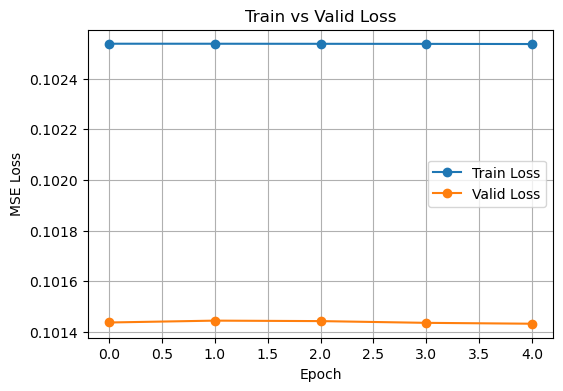

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(train_losses, marker='o', label="Train Loss")
plt.plot(valid_losses, marker='o', label="Valid Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Train vs Valid Loss")
plt.legend()
plt.grid(True)
plt.show()

In [24]:
def evaluate_per_gene(model, loader, device="cuda"):
    model.eval()

    diffs = []

    with torch.no_grad():
        for batch in loader:
            input_ids, values, mask, deltaX_true = batch
            input_ids = input_ids.to(device)
            values = values.to(device)
            mask = mask.to(device)
            deltaX_true = deltaX_true.to(device)

            pred = model(input_ids, values, mask)
            diff = (pred - deltaX_true).cpu().numpy()
            diffs.append(diff)

    diffs = np.concatenate(diffs, axis=0)    # (N, 5000)
    mse_per_gene = np.mean(diffs**2, axis=0)

    return mse_per_gene

In [25]:
mse_genes = evaluate_per_gene(fr_model, test_loader, device)

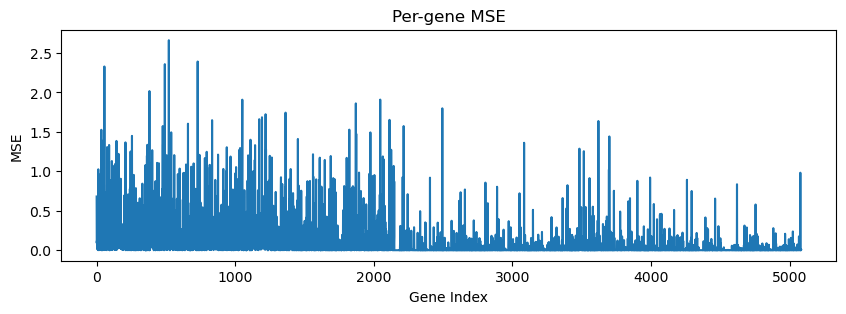

In [26]:
plt.figure(figsize=(10,3))
plt.plot(mse_genes)
plt.title("Per-gene MSE")
plt.xlabel("Gene Index")
plt.ylabel("MSE")
plt.show()